# Домашнее задание 4 - Непараметрические критерии


##Задача 1 (5 баллов)




1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и биномиальное с параметрами 1, 0.5 и размером 100
2.   Для каждого распределения
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова
3.   Собрать новую выборку из ваших 2 сгенирированных распределений. Для этого взять случайных 900 элементов из нормального распределения и добавить к ним выборку с биномиальным распределением, чтобы снова получили выборки из 1000 элементов
4.   Для новой "собранной выборки"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
5.  Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений
6. Для новой выборки с "докинутым эффектом"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения(изначальное нормальное из п1 и полученное в п5) имееют общее распределение с помощью критерия однородности Смирнова





















**1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и биномиальное с параметрами 1, 0.5 и размером 100**

In [ ]:
from scipy import stats
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

mu = 5
sigma = 1.5
size = 1000

data_normal = np.random.normal(mu, sigma, size)
data_normal_fixed = data_normal.copy()

n = 1
p = 0.5
size = 100

data_binomial = np.random.binomial(n, p, size)

Для каждого распределения:
* Построить Q-Q plot
* Проверить нормальность с помощью критерия согласия Колмогорова
* Проверить нормальность с помощью критерия Шапиро-Уилка
* Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова

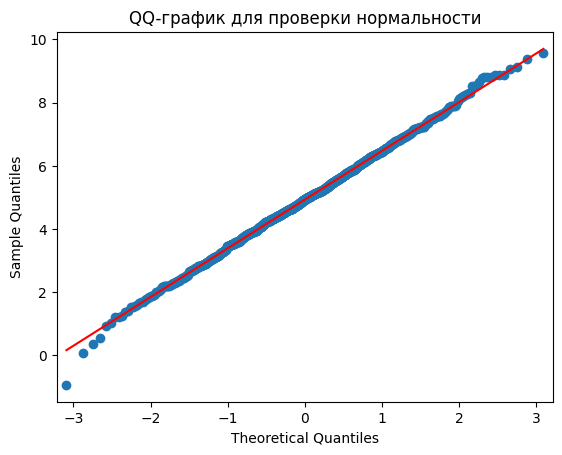

In [ ]:
sm.qqplot(data_normal, line='s')
plt.title('QQ-график для проверки нормальности')
plt.show()

Практически везде точки совпадают с диагональной линией QQ графика - можем сделать вывод, что распределение нормальное

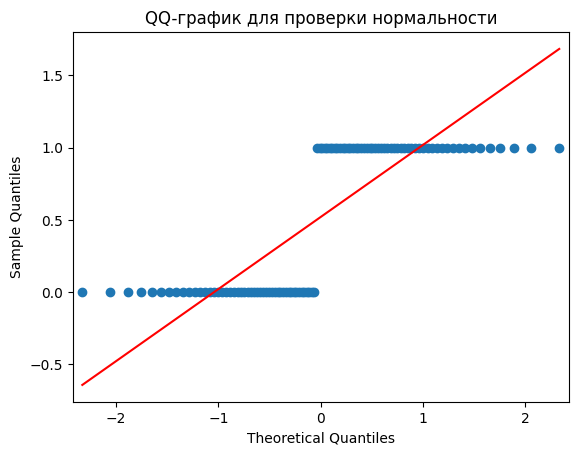

In [ ]:
sm.qqplot(data_binomial, line='s')
plt.title('QQ-график для проверки нормальности')
plt.show()

Здесь у нас вообще только два дискретных значения - распределение не нормальное

In [ ]:
stats.kstest(data_normal, 'norm', args=(data_normal.mean(), data_normal.std(ddof=1)))

KstestResult(statistic=0.01701310599852346, pvalue=0.9295265053789472, statistic_location=5.270988496723197, statistic_sign=1)

Значение pvalue > 0.05 , принимаем гипотезу о том, что распределение нормальное

In [ ]:
stats.kstest(data_binomial, 'norm', args=(data_binomial.mean(), data_binomial.std(ddof=1)))

KstestResult(statistic=0.35045201186231845, pvalue=1.7437759271251863e-11, statistic_location=1, statistic_sign=-1)

Значение pvalue < 0.05 , отклоняем гипотезу о том, что распределение нормальное

Проверить нормальность с помощью критерия Шапиро-Уилка

In [ ]:
stats.shapiro(data_normal)

ShapiroResult(statistic=0.9990719468443722, pvalue=0.9076445565138709)

Критерий Шапиро-Уилка тоже подтвердил что у нас выборка из нормального распределения

In [ ]:
stats.shapiro(data_binomial)

ShapiroResult(statistic=0.6358192863457472, pvalue=2.1735753688912303e-14)

Теперь же критерий опроверг нормальность распределения

 **900 рандомных из нормального распределения и объединение с биномиальным распределением**

In [ ]:
size = 1000
selected_indices = np.random.choice(size, 900, replace=False)
new_normal = data_normal[selected_indices]

concatenated_sample = np.concatenate((new_normal, data_binomial))

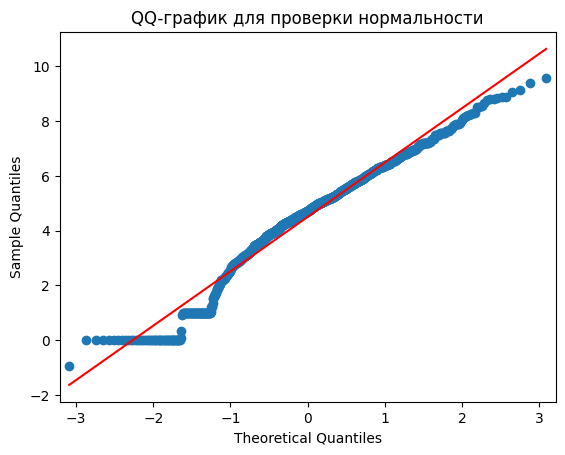

In [ ]:
sm.qqplot(concatenated_sample, line='s')
plt.title('QQ-график для проверки нормальности')
plt.show()

Исходя из графика - распределение не нормальное

In [ ]:
stats.kstest(concatenated_sample, 'norm', args=(concatenated_sample.mean(), concatenated_sample.std(ddof=1)))

KstestResult(statistic=0.07132650935539664, pvalue=7.20115395988823e-05, statistic_location=4.20788334433458, statistic_sign=-1)

Отклоняем гипотезу о том, что распределение нормальное

In [ ]:
stats.shapiro(concatenated_sample)

ShapiroResult(statistic=0.9702788873529974, pvalue=1.9617502979199046e-13)

Отклоняем гипотезу о том, что распределение нормальное

**Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений**

In [ ]:
selected_indices = np.random.choice(size, 500, replace=False)
data_normal[selected_indices] *= 1.05

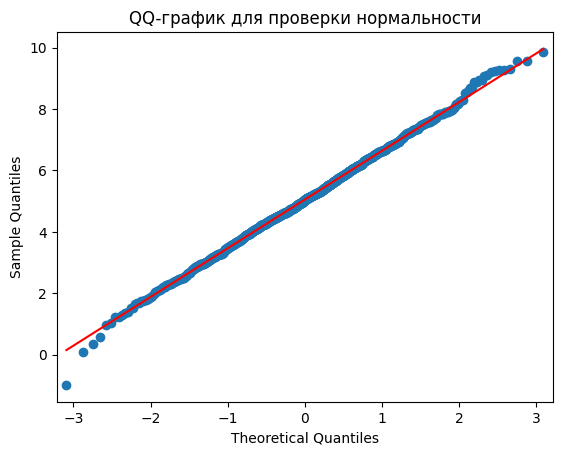

In [ ]:
sm.qqplot(data_normal, line='s')
plt.title('QQ-график для проверки нормальности')
plt.show()

Исходя из графика - распределение все еще нормальное

In [ ]:
stats.kstest(data_normal, 'norm', args=(data_normal.mean(), data_normal.std(ddof=1)))

KstestResult(statistic=0.014967966220735818, pvalue=0.9760786041101114, statistic_location=5.273936869858713, statistic_sign=1)

p-value > 0.05, распределение нормальное

In [ ]:
stats.shapiro(data_normal)

ShapiroResult(statistic=0.998914182874329, pvalue=0.8257733448625072)

p-value > 0.05, распределение нормальное

In [ ]:
stats.ks_2samp(data_normal, data_normal_fixed)

KstestResult(statistic=0.04, pvalue=0.4006338815832625, statistic_location=5.203066484924145, statistic_sign=-1)

Не отвергаем гипотезу о том, что распределения имеют общее распределение

## Задача 2 (4 балла)

Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Проверьте нормальность этих данных с помощью:
  * Q-Q plot
  * Критерия Колмогорова
  * Критерия Шапиро-Уилка


In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/employees.xls >> employees.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26624  100 26624    0     0  69485      0 --:--:-- --:--:-- --:--:-- 69514


In [ ]:
import pandas as pd

df = pd.read_excel('employees.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    object
 1   GENDER      100 non-null    object
 2   DEPART      100 non-null    object
 3   EDUC        100 non-null    object
 4   AGE         100 non-null    int64 
 5   HEIGHT      100 non-null    int64 
 6   SENIOR      100 non-null    int64 
 7   SALARY      100 non-null    int64 
 8   INI_PROF    100 non-null    int64 
 9   CUR_PROF    100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [ ]:
df.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


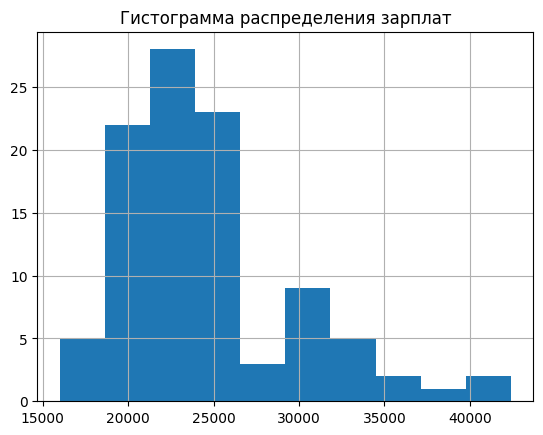

In [ ]:
df['SALARY'].hist()

plt.title('Гистограмма распределения зарплат', fontsize=12)

plt.show()

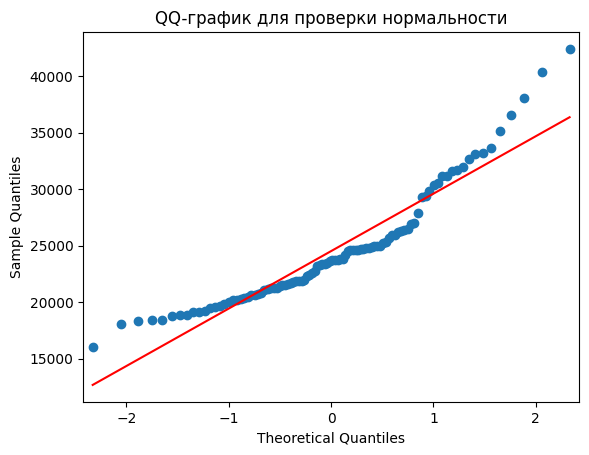

In [ ]:
salary_array = df['SALARY'].to_numpy()
sm.qqplot(salary_array, line='s')
plt.title('QQ-график для проверки нормальности')
plt.show()

Ну не, не нормальное:)

In [ ]:
stats.kstest(salary_array, 'norm', args=(salary_array.mean(), salary_array.std(ddof=1)))

KstestResult(statistic=0.1527059097996457, pvalue=0.01678820637964868, statistic_location=25000, statistic_sign=1)

На уровне значимости 5% можно отвергнуть гипотезу о нормальности распределения

In [ ]:
stats.shapiro(salary_array)

ShapiroResult(statistic=0.9015022004875934, pvalue=1.664645028598051e-06)

Здесь уже точно отвергаем гипотезу о нормальности

## Задача 3 (3 балла)

Для данных из файла employees.xls проверить с помощью критерия знаков и рангового критерия гипотезу что медианная зарплата равна 25000

In [ ]:
# сначала исключим элементы, где зарплата равна строго 25000
median = 25000
df_copy = df.copy()

i = df_copy.loc[df_copy['SALARY'] == 25000].index
df_copy.drop(i)

df_copy['DIFF'] = df_copy['SALARY'] - 25000
count_of_pluses = df_copy.loc[df_copy['DIFF'] > 0].shape[0]
count_of_minuses = df_copy.loc[df_copy['DIFF'] < 0].shape[0]

# Здесь позволил некоторое отклонение
if (abs(count_of_pluses - count_of_minuses) <= 3):
  print("Не отвергаем нулевую гипотезу о том, что медианная зарплата равна 25000")
else:
  print("Отвергаем нулевую гипотезу, медианная зарплата не равна 25000")

Отвергаем нулевую гипотезу, медианная зарплата не равна 25000


In [ ]:
stat, p_value = stats.wilcoxon(df_copy['DIFF'])
print(stat, p_value)

1809.5 0.04131952571720401


На уровне значимости 5% отклоняем гипотезу о том, что медианная зарплата равна 25000

## Задача 4 (3 балла)

В файле anorexia.txt записан вес пациентов до и после начала терапии от анорексии. С помощью критерия знаков и рангового критерия проверить, была ли эффективна данная терапия

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/anorexia.txt >> anorexia.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   355    0     0    569      0 --:--:-- --:--:-- --:--:--   570


In [ ]:
df = pd.read_csv('anorexia.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  29 non-null     float64
 1   After   29 non-null     float64
dtypes: float64(2)
memory usage: 592.0 bytes


In [ ]:
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


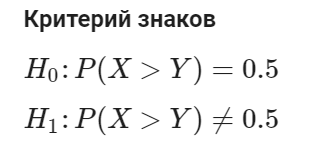

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

_, pvalue = sign_test(df['After'] - df['Before'])
pvalue

0.26493089646101

Не отклоняем нулевую гипотезу о том, что есть нет разницы после терапии

In [ ]:
stats.wilcoxon(df['After'], df['Before'])

WilcoxonResult(statistic=131.5, pvalue=0.06551516801118851)

На уровне значимости 5% не отклоняем нулевую гипотезу. Нет разницы между весом пациентов до и после курса терапии.



## Задача 5 (3 балла)

В файле seattle.txt записаны цены на объекты недвижимости в одном районе из районов Сиетла в 2001 и 2002 году (объекты выбирались случайно). Изменились ли средние цены в этом районе за год? Проверить это с помощью критерия знаков и рангового критерия

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/seattle.txt >> seattle.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   996  100   996    0     0   2857      0 --:--:-- --:--:-- --:--:--  2862


In [ ]:
df = pd.read_csv('seattle.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   Year    100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


Т.к. выборки несвязные (объекты выбирались случайно, см. условие задачи), то можем воспользоваться лишь ранговым критерием.

In [ ]:
df_2001 = df.copy()
df_2001 = df_2001.loc[df_2001['Year'] == 2001]

df_2002 = df.copy()
df_2002 = df_2002.loc[df_2002['Year'] == 2002]


In [ ]:
stats.mannwhitneyu(df_2001, df_2002, alternative='greater')

MannwhitneyuResult(statistic=array([1295.5,    0. ]), pvalue=array([0.37819363, 1.        ]))

Нулевая гипотеза принимается: цены за год не увеличились (скорее всего, везде сомневаемся :D)

## Задача 6 (3 балла)

В рамках исследования эффективности лекарства
пациенты с синдромом дефицита внимания и гиперактивностью в течение недели принимали либо лекарство, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. Был ли эффект от применения лекарства? Данные находятся в файле methylphenidate.txt.

In [ ]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/methylphenidate.txt >> methylphenidate.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    337      0 --:--:-- --:--:-- --:--:--   338


In [ ]:
df = pd.read_csv('methylphenidate.txt', sep=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Placebo          24 non-null     int64
 1   Methylphenidate  24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [ ]:
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [ ]:
stats.mannwhitneyu(df['Placebo'], df['Methylphenidate'], alternative='greater')

MannwhitneyuResult(statistic=206.0, pvalue=0.9558649497835482)

Принимаем нулевую гипотезу о том, что не было разницы между употреблением метилфенидата и плацебо

## Задача 7 (2 балла)


1.   Сгенерировать выборки с нормальным распределением без выбросов, докинуть эффект на одну из них равномерно и с помощью распределения
2.   То же, что и в п1, но выборки с выбросами сделать
3.   Для случаев из п1 и п2 бутстрэпом оценить: среднее, медиану, 25% перцентиль, построить доверительные интервалы для статистик (речь о разницах средних/медиан/перцентилей для групп)
4.   Для случаев из п1 и п2 оценить среднее т-тестом и Манном-Уитни. Сравнить с результатами бутстрэпа. Сделать выводы. Сравниваем точечные оценки (на бутстрэпе их тоже считаем)

Примечание:
- Бутстреп считать минимум на 1000 итераций
- Для докидывания эффекта с помощью распределения возьмите распределение из stats, параметры задаются исходя из параметров изначального вектора и желаемого эффекта


In [ ]:
mean = 70
std_deviation = 10
sample_size = 500

sample1_1 = np.random.normal(mean, std_deviation, sample_size)
sample2_1 = np.random.normal(mean, std_deviation, sample_size)

sample2_with_effect_1 = sample2_1 * 1.05

# добавляем эффект при помощи равномерного распределения (т.е. каждому элементу из sample2 добавляем рандомное число от -2 до 2)
effect_distribution_1 = np.random.uniform(-2, 2, sample_size)
sample2_with_distr_effect_1 = sample2_1 + effect_distribution_1


Text(0, 0.5, 'Frequency')

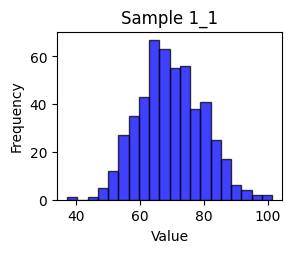

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample1_1, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 1_1')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

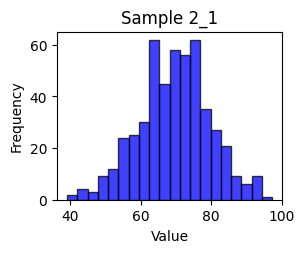

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_1, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_1')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

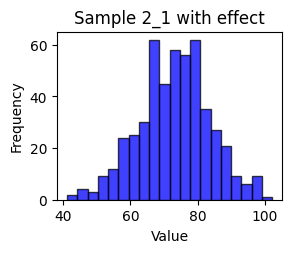

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_with_effect_1, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_1 with effect')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

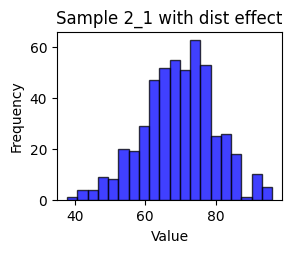

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_with_distr_effect_1, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_1 with dist effect')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
num_of_outliers = 5
outlier_value = 153


sample1_2 = np.random.normal(mean, std_deviation, sample_size)
sample2_2 = np.random.normal(mean, std_deviation, sample_size)

sample1_2[:num_of_outliers] = outlier_value

sample2_2[:num_of_outliers] = outlier_value

sample2_with_effect_2 = sample2_2 * 1.05

effect_distribution_2 = np.random.uniform(-2, 2, sample_size)
sample2_with_distr_effect_2 = sample2_2 + effect_distribution_2


Text(0, 0.5, 'Frequency')

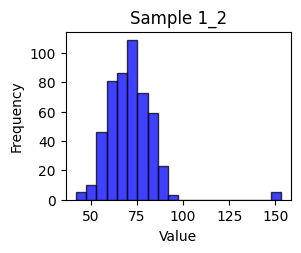

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample1_2, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 1_2')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

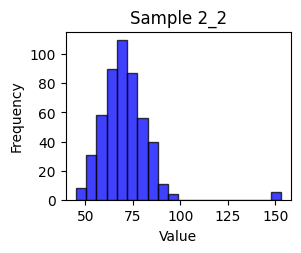

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_2, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_2')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

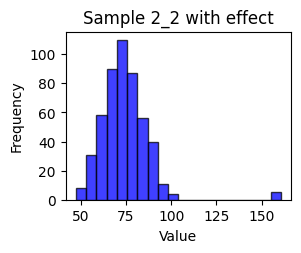

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_with_effect_2, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_2 with effect')
plt.xlabel('Value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

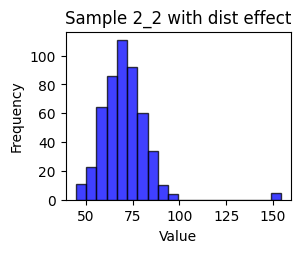

In [ ]:
plt.subplot(2, 2, 1)
plt.hist(sample2_with_distr_effect_2, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Sample 2_2 with dist effect')
plt.xlabel('Value')
plt.ylabel('Frequency')


In [ ]:
num_bootstrap_samples = 1000

def bootstrap_sample(data):
    bootstrap_means = []
    bootstrap_medians = []
    bootstrap_25_percentiles = []

    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
        bootstrap_medians.append(np.median(bootstrap_sample))
        bootstrap_25_percentiles.append(np.percentile(bootstrap_sample, 25))

    return bootstrap_means, bootstrap_medians, bootstrap_25_percentiles


In [ ]:
btp_mean_sample_1_1, btp_median_sample_1_1, btp_percentile_sample_1_1 = bootstrap_sample(sample1_1)
btp_mean_sample_2_1, btp_median_sample_2_1, btp_percentile_sample_2_1 = bootstrap_sample(sample2_1)
btp_mean_sample_2_1_with_eff, btp_median_sample_2_1_with_eff, btp_percentile_sample_2_1_with_eff = bootstrap_sample(sample2_with_effect_1)
btp_mean_sample_2_1_with_distr_eff, btp_median_sample_2_1_with_distr_eff, btp_percentile_sample_2_1_with_distr_eff = bootstrap_sample(sample2_with_distr_effect_1)

print("Статистика бутстрапа для sample1 без выбросов:")
print("Среднее:", np.mean(btp_mean_sample_1_1))
print("Медиана:", np.mean(btp_median_sample_1_1))
print("25 перцентиль", np.mean(btp_percentile_sample_1_1))

Статистика бутстрапа для sample1 без выбросов:
Среднее: 69.78958326585577
Медиана: 69.13123631862533
25 перцентиль 62.99407429433512


In [ ]:
print("Статистика бутстрапа для sample2 без выбросов:")
print("Среднее:", np.mean(btp_mean_sample_2_1))
print("Медиана:", np.mean(btp_median_sample_2_1))
print("25 перцентиль", np.mean(btp_percentile_sample_2_1))

Статистика бутстрапа для sample2 без выбросов:
Среднее: 69.54190143083053
Медиана: 70.07123221040648
25 перцентиль 63.177593519244446


In [ ]:
print("Статистика бутстрапа для sample2 с эффектом без выбросов:")
print("Среднее:", np.mean(btp_mean_sample_2_1_with_eff))
print("Медиана:", np.mean(btp_median_sample_2_1_with_eff))
print("25 перцентиль", np.mean(btp_percentile_sample_2_1_with_eff))

Статистика бутстрапа для sample2 с эффектом без выбросов:
Среднее: 73.04016043668362
Медиана: 73.55170508615626
25 перцентиль 66.32613811910007


In [ ]:
print("Статистика бутстрапа для sample2 с эффектом, используя распределение, без выбросов:")
print("Среднее:", np.mean(btp_mean_sample_2_1_with_distr_eff))
print("Медиана:", np.mean(btp_median_sample_2_1_with_distr_eff))
print("25 перцентиль", np.mean(btp_percentile_sample_2_1_with_distr_eff))

Статистика бутстрапа для sample2 с эффектом, используя распределение, без выбросов:
Среднее: 69.5635638065161
Медиана: 69.90272700592402
25 перцентиль 63.08241899968013


# Доверительные интервалы

Распределения без выбросов:

In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_1_1, alpha/2)
right = np.quantile(btp_mean_sample_1_1, 1-alpha/2)
print('sample1 mean ci:', left, right)

left = np.quantile(btp_median_sample_1_1, alpha/2)
right = np.quantile(btp_median_sample_1_1, 1-alpha/2)
print('sample1 median ci:', left, right)

left = np.quantile(btp_percentile_sample_1_1, alpha/2)
right = np.quantile(btp_percentile_sample_1_1, 1-alpha/2)
print('sample1 25% percentile ci:', left, right)

sample1 mean ci: 68.9717678344173 70.6877445620559
sample1 median ci: 68.13380403672929 70.44066324669586
sample1 25% percentile ci: 61.74862011585259 64.00420625569528


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_2_1, alpha/2)
right = np.quantile(btp_mean_sample_2_1, 1-alpha/2)
print('sample2 mean ci:', left, right)

left = np.quantile(btp_median_sample_2_1, alpha/2)
right = np.quantile(btp_median_sample_2_1, 1-alpha/2)
print('sample2 median ci:', left, right)

left = np.quantile(btp_percentile_sample_2_1, alpha/2)
right = np.quantile(btp_percentile_sample_2_1, 1-alpha/2)
print('sample2 25% percentile ci:', left, right)

sample2 mean ci: 68.69004278250662 70.42014920115328
sample2 median ci: 68.95439310099572 71.06737681300903
sample2 25% percentile ci: 62.04180648855946 64.26619630067042


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_2_1_with_eff, alpha/2)
right = np.quantile(btp_mean_sample_2_1_with_eff, 1-alpha/2)
print('sample2 with effect mean ci:', left, right)

left = np.quantile(btp_median_sample_2_1_with_eff, alpha/2)
right = np.quantile(btp_median_sample_2_1_with_eff, 1-alpha/2)
print('sample2 with effect median ci:', left, right)

left = np.quantile(btp_percentile_sample_2_1_with_eff, alpha/2)
right = np.quantile(btp_percentile_sample_2_1_with_eff, 1-alpha/2)
print('sample2 with effect 25% percentile ci:', left, right)

sample2 with effect mean ci: 72.16969549849011 73.95402863386819
sample2 with effect median ci: 72.45123328947031 74.627322856622
sample2 with effect 25% percentile ci: 65.2251685895437 67.47916782767933


# Распределения с выбросами

In [ ]:
btp_mean_sample_1_2, btp_median_sample_1_2, btp_percentile_sample_1_2 = bootstrap_sample(sample1_2)
btp_mean_sample_2_2, btp_median_sample_2_2, btp_percentile_sample_2_2 = bootstrap_sample(sample2_2)
btp_mean_sample_2_2_with_eff, btp_median_sample_2_2_with_eff, btp_percentile_sample_2_2_with_eff = bootstrap_sample(sample2_with_effect_2)
btp_mean_sample_2_2_with_distr_eff, btp_median_sample_2_2_with_distr_eff, btp_percentile_sample_2_2_with_distr_eff = bootstrap_sample(sample2_with_distr_effect_2)

print("Статистика бутстрапа для sample1 с выбросами:")
print("Среднее:", np.mean(btp_mean_sample_1_2))
print("Медиана:", np.mean(btp_median_sample_1_2))
print("25 перцентиль", np.mean(btp_percentile_sample_1_2))

Статистика бутстрапа для sample1 с выбросами:
Среднее: 71.23159964074989
Медиана: 70.72503255874787
25 перцентиль 63.249494218149906


In [ ]:
print("Статистика бутстрапа для sample2 с выбросами:")
print("Среднее:", np.mean(btp_mean_sample_2_2))
print("Медиана:", np.mean(btp_median_sample_2_2))
print("25 перцентиль", np.mean(btp_percentile_sample_2_2))

Статистика бутстрапа для sample2 с выбросами:
Среднее: 70.693946360368
Медиана: 70.10136264519963
25 перцентиль 62.99977562475114


In [ ]:
print("Статистика бутстрапа для sample2 с эффектом с выбросами:")
print("Среднее:", np.mean(btp_mean_sample_2_2_with_eff))
print("Медиана:", np.mean(btp_median_sample_2_2_with_eff))
print("25 перцентиль", np.mean(btp_percentile_sample_2_2_with_eff))

Статистика бутстрапа для sample2 с эффектом с выбросами:
Среднее: 74.26223284401945
Медиана: 73.61834924411635
25 перцентиль 66.1700372163373


In [ ]:
print("Статистика бутстрапа для sample2 с эффектом распределения с выбросами:")
print("Среднее:", np.mean(btp_mean_sample_2_2_with_distr_eff))
print("Медиана:", np.mean(btp_median_sample_2_2_with_distr_eff))
print("25 перцентиль", np.mean(btp_percentile_sample_2_2_with_distr_eff))

Статистика бутстрапа для sample2 с эффектом распределения с выбросами:
Среднее: 70.70980511463752
Медиана: 70.10313258801631
25 перцентиль 62.7936602378467


# Доверительные интервалы


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_1_2, alpha/2)
right = np.quantile(btp_mean_sample_1_2, 1-alpha/2)
print('sample1 mean ci:', left, right)

left = np.quantile(btp_median_sample_1_2, alpha/2)
right = np.quantile(btp_median_sample_1_2, 1-alpha/2)
print('sample1 median ci:', left, right)

left = np.quantile(btp_percentile_sample_1_2, alpha/2)
right = np.quantile(btp_percentile_sample_1_2, 1-alpha/2)
print('sample1 25% percentile ci:', left, right)

sample1 mean ci: 70.20028450837579 72.3348668916307
sample1 median ci: 69.7790870198611 71.57638484395343
sample1 25% percentile ci: 62.06778514814279 64.59189907989716


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_2_2, alpha/2)
right = np.quantile(btp_mean_sample_2_2, 1-alpha/2)
print('sample2 mean ci:', left, right)

left = np.quantile(btp_median_sample_2_2, alpha/2)
right = np.quantile(btp_median_sample_2_2, 1-alpha/2)
print('sample2 median ci:', left, right)

left = np.quantile(btp_percentile_sample_2_2, alpha/2)
right = np.quantile(btp_percentile_sample_2_2, 1-alpha/2)
print('sample2 25% percentile ci:', left, right)

sample2 mean ci: 69.59782766781957 71.85943264076954
sample2 median ci: 69.07835965512596 70.95399158669679
sample2 25% percentile ci: 61.88575996127331 64.06451911865281


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_2_2_with_eff, alpha/2)
right = np.quantile(btp_mean_sample_2_2_with_eff, 1-alpha/2)
print('sample2 with eff mean ci:', left, right)

left = np.quantile(btp_median_sample_2_2_with_eff, alpha/2)
right = np.quantile(btp_median_sample_2_2_with_eff, 1-alpha/2)
print('sample2 with eff median ci:', left, right)

left = np.quantile(btp_percentile_sample_2_2_with_eff, alpha/2)
right = np.quantile(btp_percentile_sample_2_2_with_eff, 1-alpha/2)
print('sample2 with eff 25% percentile ci:', left, right)

sample2 with eff mean ci: 73.08227435053351 75.58571519025664
sample2 with eff median ci: 72.50352920035408 74.51798438532292
sample2 with eff 25% percentile ci: 64.93375230834063 67.28022019695683


In [ ]:
alpha = 0.05

left = np.quantile(btp_mean_sample_2_2_with_distr_eff, alpha/2)
right = np.quantile(btp_mean_sample_2_2_with_distr_eff, 1-alpha/2)
print('sample2 with distr eff mean ci:', left, right)

left = np.quantile(btp_median_sample_2_2_with_distr_eff, alpha/2)
right = np.quantile(btp_median_sample_2_2_with_distr_eff, 1-alpha/2)
print('sample2 with distr eff median ci:', left, right)

left = np.quantile(btp_percentile_sample_2_2_with_distr_eff, alpha/2)
right = np.quantile(btp_percentile_sample_2_2_with_distr_eff, 1-alpha/2)
print('sample2 with distr eff 25% percentile ci:', left, right)

sample2 with distr eff mean ci: 69.59850158050985 71.90412672033193
sample2 with distr eff median ci: 69.1431494770075 71.10784130700065
sample2 with distr eff 25% percentile ci: 61.68483786515097 63.79098536290909


# Сравнение точечных оценок исходных распределений с их бутстрапированными версиями

In [ ]:
def bootstrap_sample_std(data):
    bootstrap_stds = []

    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_stds.append(np.std(bootstrap_sample))

    return np.mean(bootstrap_stds)

sample1 без выбросов




In [ ]:
sample_1_1_mean = np.mean(sample1_1)
sample_1_1_median = np.median(sample1_1)
sample_1_1_std = np.std(sample1_1)

print("Sample 1 mean:", sample_1_1_mean)
print("Sample 1 bootstrapped mean:", np.mean(btp_mean_sample_1_1))

print("Sample 1 median:", sample_1_1_median)
print("Sample 1 bootstrapped median:", np.mean(btp_median_sample_1_1))

print("Sample 1 std:", sample_1_1_std)
print("Sample 1 bootstrapped std:", bootstrap_sample_std(sample1_1))



Sample 1 mean: 69.78878003138865
Sample 1 bootstrapped mean: 69.78958326585577
Sample 1 median: 69.02854467453375
Sample 1 bootstrapped median: 69.13123631862533
Sample 1 std: 10.008307528024847
Sample 1 bootstrapped std: 9.999602688637838


sample2 без выбросов


In [ ]:
sample_2_1_mean = np.mean(sample2_1)
sample_2_1_median = np.median(sample2_1)
sample_2_1_std = np.std(sample2_1)

print("Sample 2 mean:", sample_2_1_mean)
print("Sample 2 bootstrapped mean:", np.mean(btp_mean_sample_2_1))

print("Sample 2 median:", sample_2_1_median)
print("Sample 2 bootstrapped median:", np.mean(btp_median_sample_2_1))

print("Sample 2 std:", sample_2_1_std)
print("Sample 2 bootstrapped std:", bootstrap_sample_std(sample2_1))



Sample 2 mean: 69.56461842853707
Sample 2 bootstrapped mean: 69.54190143083053
Sample 2 median: 70.04961068356977
Sample 2 bootstrapped median: 70.07123221040648
Sample 2 std: 10.086411261570953
Sample 2 bootstrapped std: 10.058100317126245


sample 2 с эффектом без выбросов

In [ ]:
sample_2_with_eff_1_mean = np.mean(sample2_with_effect_1)
sample_2_with_eff_1_median = np.median(sample2_with_effect_1)
sample_2_with_eff_1_std = np.std(sample2_with_effect_1)

print("Sample 2 with eff mean:", sample_2_with_eff_1_mean)
print("Sample 2 with eff bootstrapped mean:", np.mean(btp_mean_sample_2_1_with_eff))

print("Sample 2 with eff median:", sample_2_with_eff_1_median)
print("Sample 2 with eff bootstrapped median:", np.mean(btp_median_sample_2_1_with_eff))

print("Sample 2 with eff std:", sample_2_with_eff_1_std)
print("Sample 2 with eff bootstrapped std:", bootstrap_sample_std(sample2_with_effect_1))



Sample 2 with eff mean: 73.04284934996393
Sample 2 with eff bootstrapped mean: 73.04016043668362
Sample 2 with eff median: 73.55209121774827
Sample 2 with eff bootstrapped median: 73.55170508615626
Sample 2 with eff std: 10.5907318246495
Sample 2 with eff bootstrapped std: 10.572433502050542


sample 2 с распределительным эффектом без выбросов

In [ ]:
sample_2_with_distr_eff_1_mean = np.mean(sample2_with_distr_effect_1)
sample_2_with_distr_eff_1_median = np.median(sample2_with_distr_effect_1)
sample_2_with_distr_eff_1_std = np.std(sample2_with_distr_effect_1)

print("Sample 2 with distr eff mean:", sample_2_with_distr_eff_1_mean)
print("Sample 2 with distr eff bootstrapped mean:", np.mean(btp_mean_sample_2_1_with_distr_eff))

print("Sample 2 with distr eff median:", sample_2_with_distr_eff_1_median)
print("Sample 2 with distr eff bootstrapped median:", np.mean(btp_median_sample_2_1_with_distr_eff))

print("Sample 2 with distr eff std:", sample_2_with_distr_eff_1_std)
print("Sample 2 with distr eff bootstrapped std:", bootstrap_sample_std(sample2_with_distr_effect_1))

Sample 2 with distr eff mean: 69.54675071290713
Sample 2 with distr eff bootstrapped mean: 69.5635638065161
Sample 2 with distr eff median: 69.92554933645366
Sample 2 with distr eff bootstrapped median: 69.90272700592402
Sample 2 with distr eff std: 10.20945347263912
Sample 2 with distr eff bootstrapped std: 10.195724494741109


sample1 с выбросами


In [ ]:
sample_1_2_mean = np.mean(sample1_2)
sample_1_2_median = np.median(sample1_2)
sample_1_2_std = np.std(sample1_2)

print("Sample 1 mean:", sample_1_2_mean)
print("Sample 1 bootstrapped mean:", np.mean(btp_mean_sample_1_2))

print("Sample 1 median:", sample_1_2_median)
print("Sample 1 bootstrapped median:", np.mean(btp_median_sample_1_2))

print("Sample 1 std:", sample_1_2_std)
print("Sample 1 bootstrapped std:", bootstrap_sample_std(sample1_2))

Sample 1 mean: 71.23126735413831
Sample 1 bootstrapped mean: 71.23159964074989
Sample 1 median: 70.80278482831596
Sample 1 bootstrapped median: 70.72503255874787
Sample 1 std: 12.787337523845519
Sample 1 bootstrapped std: 12.722284125903654


sample 2 с выбросами

In [ ]:
sample_2_2_mean = np.mean(sample2_2)
sample_2_2_median = np.median(sample2_2)
sample_2_2_std = np.std(sample2_2)

print("Sample 2 mean:", sample_2_2_mean)
print("Sample 2 bootstrapped mean:", np.mean(btp_mean_sample_2_2))

print("Sample 2 median:", sample_2_2_median)
print("Sample 2 bootstrapped median:", np.mean(btp_median_sample_2_2))

print("Sample 2 std:", sample_2_2_std)
print("Sample 2 bootstrapped std:", bootstrap_sample_std(sample2_2))

Sample 2 mean: 70.7105523428146
Sample 2 bootstrapped mean: 70.693946360368
Sample 2 median: 70.13339728390228
Sample 2 bootstrapped median: 70.10136264519963
Sample 2 std: 12.800438815493525
Sample 2 bootstrapped std: 12.793139423511034


sample 2 с эффектом с выбросами

In [ ]:
sample_2_with_eff_2_mean = np.mean(sample2_with_effect_2)
sample_2_with_eff_2_median = np.median(sample2_with_effect_2)
sample_2_with_eff_2_std = np.std(sample2_with_effect_2)

print("Sample 2 with eff mean:", sample_2_with_eff_2_mean)
print("Sample 2 with eff bootstrapped mean:", np.mean(btp_mean_sample_2_2_with_eff))

print("Sample 2 with eff median:", sample_2_with_eff_2_median)
print("Sample 2 with eff bootstrapped median:", np.mean(btp_median_sample_2_2_with_eff))

print("Sample 2 with eff std:", sample_2_with_eff_2_std)
print("Sample 2 with eff bootstrapped std:", bootstrap_sample_std(sample2_with_effect_2))



Sample 2 with eff mean: 74.24607995995532
Sample 2 with eff bootstrapped mean: 74.26223284401945
Sample 2 with eff median: 73.6400671480974
Sample 2 with eff bootstrapped median: 73.61834924411635
Sample 2 with eff std: 13.440460756268203
Sample 2 with eff bootstrapped std: 13.451420267067489


sample 2 с распределительным эффектом и выбросами

In [ ]:
sample_2_with_distr_eff_2_mean = np.mean(sample2_with_distr_effect_2)
sample_2_with_distr_eff_2_median = np.median(sample2_with_distr_effect_2)
sample_2_with_distr_eff_2_std = np.std(sample2_with_distr_effect_2)

print("Sample 2 with distr eff mean:", sample_2_with_distr_eff_2_mean)
print("Sample 2 with distr eff bootstrapped mean:", np.mean(btp_mean_sample_2_2_with_distr_eff))

print("Sample 2 with distr eff median:", sample_2_with_distr_eff_2_median)
print("Sample 2 with distr eff bootstrapped median:", np.mean(btp_median_sample_2_2_with_distr_eff))

print("Sample 2 with distr eff std:", sample_2_with_distr_eff_2_std)
print("Sample 2 with distr eff bootstrapped std:", bootstrap_sample_std(sample2_with_distr_effect_2))

Sample 2 with distr eff mean: 70.7156398769613
Sample 2 with distr eff bootstrapped mean: 70.70980511463752
Sample 2 with distr eff median: 70.1142900148159
Sample 2 with distr eff bootstrapped median: 70.10313258801631
Sample 2 with distr eff std: 12.807915176729782
Sample 2 with distr eff bootstrapped std: 12.72665551344653


## Задача 8 (2 балла)

Сгенерировать 2 выборки из нормального распределения с 1000 элементов каждая.
- Оцените на этих данных мощность и корректность t-test и Манна-Уитни
- Докиньте выбросы в обе группы и проверьте как изменится мощность и корректность

Для оценки использовать минимум 1000 итераций

In [ ]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

def evaluate_tests(sample1, sample2, n_iterations=1000, alpha=0.05):
    t_test_power = 0
    mann_whitney_power = 0
    t_test_correctness = 0
    mann_whitney_correctness = 0

    for _ in range(n_iterations):
        t_stat, t_p_value = ttest_ind(sample1, sample2)
        if t_p_value < alpha:
            t_test_power += 1
        else:
            t_test_correctness += 1

        mw_stat, mw_p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
        if mw_p_value < alpha:
            mann_whitney_power += 1
        else:
            mann_whitney_correctness += 1

    t_test_power /= n_iterations
    mann_whitney_power /= n_iterations
    t_test_correctness /= n_iterations
    mann_whitney_correctness /= n_iterations

    return t_test_power, mann_whitney_power, t_test_correctness, mann_whitney_correctness


# два нормальных распределения без выбросов
sample1 = np.random.normal(5, 1, 1000)
sample2 = np.random.normal(6, 1, 1000)

t_test_power, mann_whitney_power, t_test_correctness, mann_whitney_correctness = evaluate_tests(sample1, sample2)

print("Без выбросов:")
print(f"t-тест: мощность = {t_test_power:.3f}, корректность = {t_test_correctness:.3f}")
print(f"Тест Манна-Уитни: мощность = {mann_whitney_power:.3f}, корректность = {mann_whitney_correctness:.3f}")

# добавим щепоточку выбросов... упс...
sample1_with_outliers = np.concatenate([sample1, [15000, 15000, 15000]])
sample2_with_outliers = np.concatenate([sample2, [15000, 15000, 15000]])

t_test_power_outliers, mann_whitney_power_outliers, t_test_correctness_outliers, mann_whitney_correctness_outliers = evaluate_tests(sample1_with_outliers, sample2_with_outliers)

print("\nС выбросами:")
print(f"t-тест: мощность = {t_test_power_outliers:.3f}, корректность = {t_test_correctness_outliers:.3f}")
print(f"Тест Манна-Уитни: мощность = {mann_whitney_power_outliers:.3f}, корректность = {mann_whitney_correctness_outliers:.3f}")


Без выбросов:
t-тест: мощность = 1.000, корректность = 0.000
Тест Манна-Уитни: мощность = 1.000, корректность = 0.000

С выбросами:
t-тест: мощность = 0.000, корректность = 1.000
Тест Манна-Уитни: мощность = 1.000, корректность = 0.000


Без выбросов видим результаты, которые говорят о том, что мы с большой (очень большой) вероятностью обнаружим различия между распределениями, если они существуют. Об этом нам говорит мощность тестов.

С выбросами мы уже видим другую картину: t-тест не обнаруживает различия между распределениями, даже если они имеются, т.к. этот тест очень чувствителен к выбросам.